                                                                                         Marta Granero i Martí
# Primera lista - Problema individual 3                                                                                                                       
## ¿Kullback que?

### Cuando trabajamos con modelos que representan una distribución de probabilidad nuestro objetivo es hacer que la distribución de los datos se acerque lo más posible a las probabilidades que nos da el modelo sobre esos datos. Existen muchas maneras de calcular esa diferencia, una común es usar funciones de divergencia, entre ellas la divergencia de Kullback-Leibler es la más usada. Dadas dos distribuciones de probabilidad P y Q se define asumiendo que sean distribuciones discretas como:

$$
KL(P|Q) = \sum_{i} P(i) log \frac{P(i)}{Q(i)}
$$

### En el caso de distribuciones continuas, simplemente substituimos el sumatorio por una integral.

### Aclaraciones y notaciones del enunciado

Antes de empezar con los ejercicios, me gustaría analizar lo que nos está pidiendo el ejercicio en cuestión.

Empezamos analizando la parte dónde se nos menciona la forma de calcular la diferencia entre las distribuciones empleando la Divergencia de Kullback-Leibler, o abreviada KL.

Notamos que, esta función de divergencia es una medida que nos va a decir qué tan similares o distintas son las dos distribuciones de probabilidad, P y Q. 

La distribución P en este caso nos va a representar la "verdadera" distribución de las observaciones o cualquier distribución teórica, mientras que la distribución de probabilidad Q nos va a representar un modelo o una aproximación de P.

Cabe destacar que KL es una medida no simétrica, por lo que calcular la divergencia KL de P a Q no es necesariamente la misma KL de Q a P.

Entonces no nos hemos de confundir llamando a KL una métrica o distáncia, ya que una distáncia es simétrica y por lo tanto, afirmariamos que $dist(P,Q) = dist(Q,P)$. Veamos que no se cumple, poniendo un ejemplo sencillo:

Supongamos que tenemos el siguiente espacio muestral: $\Omega = \{A,B\}$ y las probabilidades que siguen:

Por un lado: $P(A) = 0.4, P(B) = 0.6$ i por el otro: $Q(A) = 0.5, Q(B) = 0.5$


Mediante la definición KL(P|Q) obtenemos: 
$$
KL(P|Q) = \sum_{i} P(i) log \frac{P(i)}{Q(i)} = P(A) log \frac{P(A)}{Q(A)} + P(B) log \frac{P(B)}{Q(B)} \approx 0.020135
$$ 

I si lo hacemos en el otro sentido:
$$
KL(Q|P) = \sum_{i} Q(i) log \frac{Q(i)}{P(i)} = Q(A) log \frac{Q(A)}{P(A)} + Q(B) log \frac{Q(B)}{P(B)} \approx 0.020411
$$ 

Y por lo tanto, tenemos que $KL(P|Q) \neq KL(Q|P)$ y en efecto, probamos que KL no es una distáncia.







### Procedamos con los ejercicios que se nos piden

#### a) Siendo $X$ una muestra de datos $x_{1}, \dots, x_{n}$ de valores discretos, donde podemos estimar su distribución P a partir de su frecuencia y Q es una distribución de probabilidad sobre el mismo rango de valores discretos. Demuestra que optimizar $KL(P|Q)$ es equivalente a optimizar la log verosimilitud negativa de Q sobre los datos



Para poder resolver este problema, primero de todo hemos de tener claro qué distribuciones son P y Q. 

Se nos comenta en el enunciado que podemos estimar la distribución P a partir de la frecuencia de cada uno de los valores discretos que tiene $X$. Por lo tanto, P será nuestra distribución "verdadera". 

Y por otro lado Q, será una distribución sobre también el rango: $x_{1}, \dots, x_{n}$ de valores discretos. Esta en consecuencia, la consideraremos como la aproximación de P.

#### Segimos

Una vez aclarado qué son P y Q, nos queda explicar a qué se refiere que optimizando $KL(P|Q)$ será equivalente a optimizar la log verosimilitud negativa de Q sobre los datos.

La función de verosimilitud, será nuestra función de pérdida del modelo. Será la responsable de la estimación de los parámetros y mediante la MLE definiremos la función de los parámetros que nos va a permitir encontrar el mejor valor de estos para que se ajusten a los datos. 

Esta función será el logaritmo de la verosimilitud, ya que tenemos datos numéricos pequeños y operando con valores del calibre, p.ej: $1e-100$, podemos perder precisión, por lo tanto, mejor operar con logaritmos. Además usaremos el logaritmo negativo, ya que queremos minimizar la función de pérdida(negative log-likelihood del modelo Q).

#### Optimizando $KL(P|Q)$ llegamos a:

$$\begin{split}
KL(P|Q) &= \sum_{i} P(i) \; log \frac{P(i)}{Q(i)} \\ 
&= \sum_{i} P(i) \; (log \; P(i) - log \; Q(i)) \\
&= \sum_{i} P(i) \; log \; P(i) - \sum_{i} P(i) \; log \; Q(i) \\
\end{split}$$

Notamos, que el primer término, o también llamada entropía no importará si solo intentamos optimizar $\theta$, siendo el vector de parámetros. Es por este motivo que solo nos concentrémonos en el segundo término, o entropía cruzada. 

Notamos también que el término de la entropia de P, $\sum_{i} P(i) \; log \; P(i)$, también podemos expresarlo como: $\mathcal{H(P(i))}$

Así pues, para la optimización solo consideraremos el segundo término:

$$\begin{split}
- \sum_{i} P(i) \; log \; Q(i) \\ 
\end{split}$$

#### Minimizando $KL(P|Q)$:

Como queremos estimar la distribución $P(i)$ a partir de nuestra distribución aproximada $Q(i)$, usaremos la notación, $Q_{\theta}(i)$ para poner más énfasis en que es esta que queremos controlar.

Tendremos:

$$\begin{split}
argmin_{\theta} \; KL(P|Q) &= argmin_{\theta} \; - \sum_{i} P(i) \; log \; Q_{\theta}(i) - \mathcal{H(P(i))} \\
&= argmin_{\theta} \; - \sum_{i} P(i) \; log \; Q_{\theta}(i) \\
&= argmax_{\theta} \; \sum_{i} P(i) \; log \; Q_{\theta}(i) \\
\end{split}$$

Por otro lado, si nos fijamos atentamente en la definición de la Máxima verosimilitud(MLE) que usa como función de pérdida la log verosimilitud negativa de Q, tendremos el mismo propósito que con la minimización calculada anteriormente. 

Esto es así, porqué optimizar la log verosimilitud negativa de Q sobre P i minimizar, $argmin_{\theta} \; KL(P|Q)$, es equivalente; ya que el objetivo anterior muestreará puntos de $P(i)$ y tratará de maximizar la probabilidad de estos puntos bajo $Q_{\theta}(i)$. 

<br>

#### A continuación empezaremos con el desarrollo del código:

In [1]:
# INCLUIMOS LAS LIBRERIAS NECESARIAS

import warnings
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

import jax.numpy as jnp
from jax import grad, vmap, jit, random

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#### b) Todo modelo de clasificación es una distribución de probabilidad sobre un conjunto de valores discretos, por lo que podemos ajustar un modelo probabilístico para la clasificación haciendo que las probabilidades que obtenga para una muestra se ajusten a las de los datos. Usa la función make_classification de scikit-learn para crear un conjuno de datos de clasificación de dos dimensiones y  100 ejemplos. Tendrás de dar un valor 0 al parámetro n_redundant y un valor 1 al parámetro n_clusters_per_class. Da un valor también al parámetro random_state para que los experimentos sean reproducibles. El problema que generará será de clasificación binaria.

In [2]:
# GENERAMOS EL DATA SET DEL PROBLEMA

X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_clusters_per_class=1, n_redundant=0, random_state=42);

#### c) Podemos crear un modelo probabilístico con una función lineal $f(w,x) = w · x$. Para obtener probabilidades, simplemente hemos de aplicar sobre el resultado una función que dé un valor entre 0 i 1. Por ejemplo la función sigmoide $\sigma$:
$$\begin{split}
\sigma(x) = \frac{1}{1+e^{x}} 
\end{split}$$

#### A partir de la divergencia de Kullback-Leibler simplificando para problemas binarios podemos llegar a la función de pérdida de entropia cruzada binaria(binary entropy cross):
$$\begin{split}
BCE(p(x),y) = y ·log \; (p(x)) + (1-y) · log \; (1-p(x)) 
\end{split}$$

#### Dónde p(x) és la probabilidad que le asigna el modelo a un ejemplo, e y es la etiqueta que le correponde a los datos. Implementa un algoritmo de descenso de gradiente usando $\texttt{JAX}$ con la función de entropia cruzada binaria. Explora diferentes tasas de aprendizaje. Comenta lo que observes en el comportamiento del error y los parámetros durante la optimización. Escoge un número de iteraciones y un valor para decidir el final de la optimización que te parezcan adecuados.

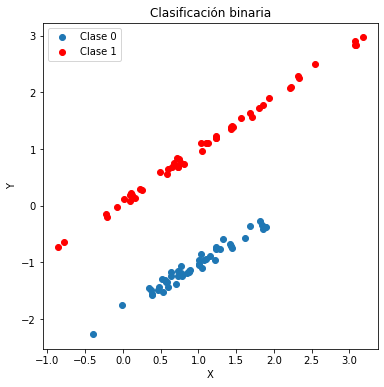

In [3]:
# PLOT DEL DATASET QUE HEMOS GENERADO

fig, axes = plt.subplots(figsize =(6,6))
axes.scatter(X[Y==0, 0], X[Y==0, 1], label='Clase 0')
axes.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Clase 1')
axes.legend()
axes.set(xlabel='X', ylabel='Y', title='Clasificación binaria');

A continuación hacemos la partición de los datos de entrenamiento y los de test:

In [4]:
# PARTIMOS LOS DATOS EN LOS DE ENTRENAMIENTO Y TEST
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=42)

# TRATAMIENTO DATOS DE ENTRENAMIENTO Y TEST
scaler = StandardScaler()
scaler.fit(XTrain)

XTrainS = scaler.transform(XTrain)
XTestS = scaler.transform(XTest)

Usando la función sigmoide, $\sigma$:
$$\begin{split}
\sigma(x) = \frac{1}{1+e^{x}} 
\end{split}$$

Y teniendo en cuenta que tenemos un vector de pesos de la forma: $\textbf w = [c \; w_{1}\dots w_{n}]^{T}$,los valores observados de los predictores, $\textbf x = [1 \; x_{1}\dots x_{n}]^{T}$, y el valor de clase asociado, tendremos:

$$
\begin{split}
P(y=1|\textbf w) = \sigma(\textbf w^{T}\textbf x) \equiv \sigma_{\textbf w}(\textbf x)
\end{split}
$$

La equivalencia anterior se justifica por el hecho de que para nuestro conjunto dado de pesos $\textbf w$, la probabilidad de un resultado positivo será: $\sigma_{\textbf w}(\textbf x)$. Esta probabilidad la implementaremos mediante la función de predicción seguiente. 

Notamos que segun la probabilidad que nos devuelva la función `prediccion`, $\sigma_{\textbf w}(\textbf x)$, classificaremos x en una etiqueta de clase, $\hat y$, u otra segun si:

$$
\begin{split}
si \; \sigma_{\textbf w}(\textbf x) \geq 0.5, \; \hat y = 1, \; en \; otro \; caso \; \hat y = 0
\end{split}
$$


In [5]:
def sigmoide(x):
    return 1 / (1 + jnp.exp(-x))


def prediccion(c, w, X):
    return sigmoide(jnp.dot(X, w) + c)

#### A continuación justificamos el uso de la función de coste.

Supongamos que tenemos los n ejemplos distribuidos independientemente según una distribución de Bernoulli, de la forma:

$$
\begin{split}
\{(\textbf x^{(1)}, y^{(1)}), (\textbf x^{(2)}, y^{(2)}), \dots, (\textbf x^{(n)}, y^{(n)})\}
\end{split}
$$

La probabilidad que nos gustaría maximizar dados los ejemplos del dataset generado es:

$$
\begin{split}
\mathcal{L(\textbf w)} = \prod_{i=1}^{n}P(y^{(i)}|\textbf x^{(i)}, \textbf w) = \prod_{i=1}^{n}\sigma_{\textbf w}(\textbf x^{(i)})^{y^{(i)}}(1-\sigma_{\textbf w}(\textbf x^{(i)}))^{y^{(i)}}
\end{split}
$$

Y finalmente, como estamos tratando con un problema de minimización, tomamos la log verosimilitud logarítmica negativa, y nos queda la expresión de la función de coste siguiente:

$$
\begin{split}
BCE(\textbf w) = - \sum_{i=1}^{n} y^{(i)} \; log \; (\sigma_{\textbf w}(\textbf x^{(i)})) + (1 - y^{(i)}) \; log \; (1 - \sigma_{\textbf w}(\textbf x^{(i)}))
\end{split}
$$

Una vez llegada a esta expresión, con nuestro algoritmo de descenso de gradiente deberíamos encontrar el mínimo global de la función de coste $BCE(\textbf w)$.

Notamos: A esta función de coste, podríamos añadirle alguna constante de regularización para mejorar el modelo, pero por el momento no lo he considerado. Este desarrollo enfatiza lo que se ha comentado en el apartado $\textbf a)$

In [6]:
# GENERAMOS EL DATA SET DEL PROBLEMA
X, Y = make_classification(n_samples=100, n_features=2, n_informative=2, n_clusters_per_class=1, n_redundant=0, random_state=42);

# PARTIMOS LOS DATOS EN LOS DE ENTRENAMIENTO Y TEST
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=42)

# TRATAMIENTO DATOS DE ENTRENAMIENTO Y TEST
scaler = StandardScaler()
scaler.fit(XTrain)

XTrainS = scaler.transform(XTrain)
XTestS = scaler.transform(XTest)


def sigmoide(x):
    return 1 / (1 + jnp.exp(-x))

def prediccion(c, w, X):
    return sigmoide(jnp.dot(X, w) + c)

# FUNCIÓN COSTE
def coste(c, w, X, Y):
    p = prediccion(c, w, X)
    return -jnp.sum(Y * jnp.log(p) + (1 - Y) * jnp.log(1 - p))

# DESCENSO DEL GRADIENTE
dim = X.shape[1]

n_iter = 1600
lr = 0.01
epsilon = 1e-4

c = 1.0
w = 1.0e-5 * jnp.ones(dim)

nouCost = float(coste(c, w, XTrainS, YTrain))
costHist = [nouCost]
for i in range(n_iter):
    currentC = c
    c -= lr * grad(coste, argnums=0)(currentC, w, XTrainS, YTrain)
    w -= lr * grad(coste, argnums=1)(currentC, w, XTrainS, YTrain)
        
    nouCost = float(coste(c, w, XTrainS, YTrain))
    costHist.append(nouCost)
    print(costHist[i])
    if jnp.abs(costHist[i] - costHist[i-1]) < epsilon:
        print(i)
        break
            
print(w, nouCost)

60.494239807128906
48.40560531616211
40.35151672363281
34.84691619873047
30.899065017700195
27.912471771240234
25.543869018554688
23.593595504760742
21.94164276123047
20.512714385986328
19.257366180419922
18.14162826538086
17.141151428222656
16.23780059814453
15.417598724365234
14.669468879699707
13.984413146972656
13.354984283447266
12.774923324584961
12.238896369934082
11.742324829101562
11.281235694885254
10.852164268493652
10.452070236206055
10.078276634216309
9.728412628173828
9.400375366210938
9.09228801727295
8.802478790283203
8.52944564819336
8.271842002868652
8.028457641601562
7.798198223114014
7.580075263977051
7.373194694519043
7.176743507385254
6.989983558654785
6.8122406005859375
6.642904281616211
6.481409549713135
6.327243328094482
6.179935455322266
6.039052486419678
5.904196262359619
5.774999618530273
5.651125431060791
5.532259464263916
5.418112754821777
5.3084187507629395
5.2029266357421875
5.101407051086426
5.003645896911621
4.90944242477417
4.818611145019531
4.7309789

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



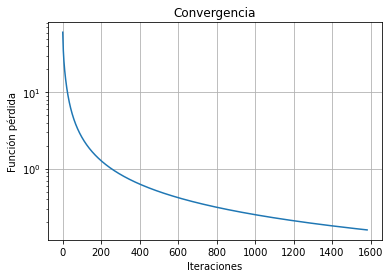

In [7]:
# PLOT CONVERGENCIA

fig, axes = plt.subplots()
plt.semilogy(costHist)
axes.grid()
fig = axes.set(xlabel="Iteraciones", ylabel="Función pérdida", title="Convergencia")

# RESULTATS
primeraFuncion = prediccion(c, w, XTestS)

y_pred_proba = prediccion(c, w, XTestS)
y_pred = jnp.array(y_pred_proba)
y_pred = jnp.where(y_pred < 0.5, y_pred, 1.0)
y_pred = jnp.where(y_pred >= 0.5, y_pred, 0.0)

print(classification_report(YTest, y_pred)) 

#### Observaciones:

En nuestro modelo he estado considerando diversas opciones de valores a la hora de inicializar los distintos parámetros que entran en juego a la hora de buscar el mínimo mediante el descenso del gradiente.

En este caso, he estado probando distintos valores para: $n\_iter$, $lr$ y para $epsilon$.

Primero, para explorar distintos valores para el hiperparámetro $lr$, he fijado el número de iteraciones y la epsilon en $100$ y $1e-6$ respectivamente. Lo que he podido observar variando este hiperparámetro $lr$, es que el algoritmo del descenso del gradiente es extremadamente sensible a este, ya que mediante este vamos a controlar el número de pasos que va a tomar el descenso del gradiente. Probando valores cercanos a 1, (0.9999, 0.999, 0.99, 0.9) el algoritmo pasa por alto el mínimo y nos lo rebasa, produciendo valores nan. Por otra parte, considerando una tasa de aprendizaje lo suficientemente pequeña, de valores como (0.0001, 0.001) veremos que el tiempo total de cálculo en gran medida aumenta. Y además, teniendo en cuenta que hemos fijado un número pequeño de iteraciones, no nos va a poder encontrar el mínimo que buscamos. Por lo tanto, decido poner un valor de, 0.01 ya que observo a priori que el algoritmo desciende de forma rápida.

Aun así, aún nos falta fijar el número iteraciones, porque como hemos visto nuestro algoritmo aún no funciona correctamente. Variando el número de iteraciones, vamos a conseguir una convergencia mejor y una reducción de la pérdida que tenemos. Para fijar un número de iteraciones, podemos plotear la función de convergencia de la función de coste, y donde se observe en el gráfico que el error desciende significativamente, vamos a considerar ese número de iteraciones, ya que después se estabilizará para un cierto valor de iteraciones y va a disminuir de manera insignificante. Puesto que cuando comienza a acercarse al mínimo, comienza a dar pasos muy pequeños hacia él para no sobrepasarlo. Por otro lado, cuando está lejos, para reducir el tiempo de cálculo, se necesitan pasos más grandes para alcanzar el mínimo más rápido.

Si observamos el gráfico obtenido veremos que para un relativo número pequeño de iteraciones enseguida tenemos una buena convergencia del error, así que decidimos tomar un valor de iteraciones de: 1600. Para decidir el criterio de detención(epsilon) he probado distintos valores, y finalmente me he quedado con un valor de $1e-4$. Si tomásemos una epsilon lo suficientemente grande, no nos bastaría para encontrar los parámetros que buscamos, ya que la diferencia de coste entre iteraciones sería grande y no es lo que deseamos. Poniendo un parámetro del orden de $1e-4$ nos bastaría.

#### d)  Genera un conjunto de datos con la función make_circles de scikit-learn usando el valor 0.1 para el parámetro noise. Optimiza el modelo para varios parámetros iniciales diferentes del modelo. Cuenta qué está sucediendo e intenta explicar el porqué.

In [8]:
X, Y = make_circles(n_samples = 100, noise = 0.1,random_state = 42)

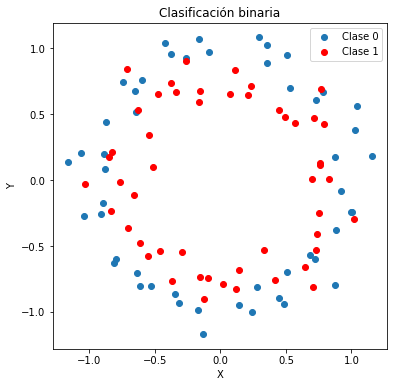

In [9]:
# PLOT DEL DATASET QUE HEMOS GENERADO

fig, axes = plt.subplots(figsize =(6,6))
axes.scatter(X[Y==0, 0], X[Y==0, 1], label='Clase 0')
axes.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Clase 1')
axes.legend()
axes.set(xlabel='X', ylabel='Y', title='Clasificación binaria');

In [10]:
# PARTIMOS LOS DATOS EN LOS DE ENTRENAMIENTO Y TEST
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=42)

# TRATAMIENTO DATOS DE ENTRENAMIENTO Y TEST
scaler = StandardScaler()
scaler.fit(XTrain)

XTrainS = scaler.transform(XTrain)
XTestS = scaler.transform(XTest)

In [11]:
# DESCENSO DEL GRADIENTE
dim = X.shape[1]

n_iter = 3000
lr = 0.001
epsilon = 1e-9

c = 1.0
w = 1.0e-5 * jnp.ones(dim)

nouCost = float(coste(c, w, XTrainS, YTrain))
costHist = [nouCost]
for i in range(n_iter):
    currentC = c
    c -= lr * grad(coste, argnums=0)(currentC, w, XTrainS, YTrain)
    w -= lr * grad(coste, argnums=1)(currentC, w, XTrainS, YTrain)
        
    nouCost = float(coste(c, w, XTrainS, YTrain))
    costHist.append(nouCost)
    print(costHist[i])
    if jnp.abs(costHist[i] - costHist[i-1]) < epsilon:
        print(i)
        break
            
print(w, nouCost)

60.494606018066406
60.1933708190918
59.90103530883789
59.617408752441406
59.34230041503906
59.07551956176758
58.81687927246094
58.56618881225586
58.32325744628906
58.0879020690918
57.85993194580078
57.63916015625
57.4254150390625
57.21849822998047
57.01824188232422
56.824462890625
56.63698196411133
56.45563507080078
56.280250549316406
56.11064910888672
55.94667434692383
55.788169860839844
55.63496017456055
55.486907958984375
55.343841552734375
55.20562744140625
55.072105407714844
54.943145751953125
54.81859588623047
54.698326110839844
54.58219528198242
54.47007751464844
54.36184310913086
54.25736999511719
54.15653991699219
54.059226989746094
53.9653205871582
53.87471008300781
53.78729248046875
53.70294952392578
53.62158966064453
53.54310607910156
53.4674072265625
53.39439392089844
53.32398223876953
53.25607681274414
53.19059753417969
53.12746047973633
53.06658172607422
53.00788879394531
52.9512939453125
52.89674377441406
52.844146728515625
52.79344940185547
52.74458312988281
52.6974792

              precision    recall  f1-score   support

           0       0.40      0.46      0.43        13
           1       0.30      0.25      0.27        12

    accuracy                           0.36        25
   macro avg       0.35      0.36      0.35        25
weighted avg       0.35      0.36      0.35        25



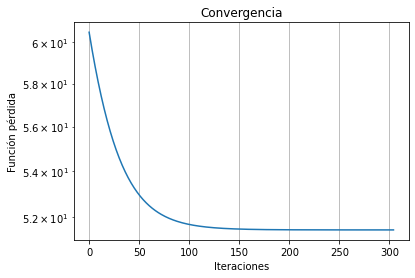

In [12]:
# PLOT CONVERGENCIA
fig, axes = plt.subplots()
plt.semilogy(costHist)
axes.grid()
fig = axes.set(xlabel="Iteraciones", ylabel="Función pérdida", title="Convergencia")

# RESULTATS
segundaFuncion = prediccion(c, w, XTestS)

y_pred_proba = prediccion(c, w, XTestS)
y_pred = jnp.array(y_pred_proba)
y_pred = jnp.where(y_pred < 0.5, y_pred, 1.0)
y_pred = jnp.where(y_pred >= 0.5, y_pred, 0.0)

print(classification_report(YTest, y_pred))

Como podemos ver, este modelo no consigue clasificar el dataset generado por `make_circles` de la misma forma precisa como el modelo para clasificar el dataset generado por `make_classification`.

Este hecho se debe a que tenemos un problema al encontrar el mínimo global con el algoritmo de descenso del gradiente.

En primera instancia pensé a que se podía tratar de un problema con el número de iteraciones, ya que a lo mejor no estaba teniendo un número lo suficientemente grande para poder llegar al óptimo. Aunque enseguida vi que no se trataba por el número de iteraciones que considerase.

Por otro lado, pensé que a lo mejor, al tratarse de un dataset con datos que forman círculos concéntricos, el problema principal a lo mejor era que no estaba realizando un escalado apropiado y consideré diversas opciones de escalado al tratar con los datos de entrenamiento y test. Al realizar los nuevos escalados solo pude observar que la precisión oscilaba para ambas clases entre un $\pm$ 0.03 de precisión.

En este punto y después de probar diversas configuraciones para los parámetros($\textbf {n_iter}$, $\textbf {epsilon}$ y $\textbf lr$) y para los datos y también intentando aplicar una regularización al modelo, pensé que a lo mejor no era posible llegar al mínimo global con el algoritmo. No estaba demasiado segura, ya que estaba tratando con una función convexa, así que lo pregunté, y en efecto, no era posible mejorar la precisión que estaba obteniendo.

Esto es debido a que mi algoritmo se estaba quedando atrapado en un muy malo, mínimo local y no en un mínimo global que yo buscaba. Esto era así, porque analizando el coste histórico que devolvía mi función de pérdida, vi que no convergía de forma correcta y por muchas iteraciones que hicieses, o por mucho que bajase la lr o la epsilon en ningún caso llegaría al punto de convergencia que yo buscaba.

Ej:
51.455318450927734,51.45531463623047, 51.45530700683594, 51.45530700683594
303
[ 0.21684793 -0.08634063] 51.455299377441406

Mi algoritmo de descenso del gradiente, se queda atrapado en el mínimo local, y no sale de este, ya que cuando comienza a acercarse al mínimo, comienza a dar pasos muy pequeños hacia él para no sobrepasarlo, lo que resulta en una clasificación de la etiqueta de clase incorrecta.

#### e) La función de entropia cruzada parece una función extraña para optimizar cuando lo que nos interesa es un modelo que tenga el mínimo número de ejemplos mal clasificado. En este caso se correspondería a la función de pérdida 0/1, que en el caso de probabilidades asignaría una pérdida de 0 a valores menores que 0.5 y 1 en caso contrario. ¿Por qué no es una buena idea optimizar directamente esta función? Representa las dos funciones

Text(0.5, 1.0, 'Funciones de pérdida')

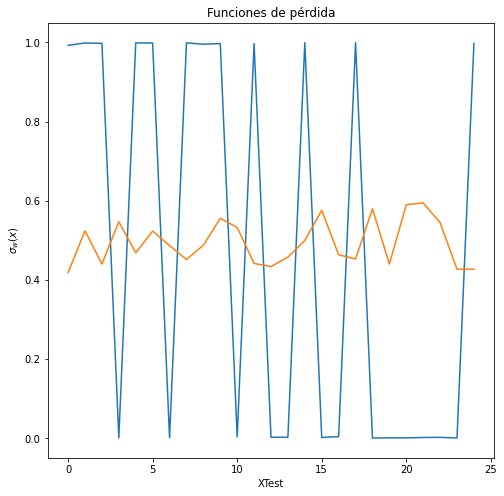

In [13]:
plt.figure(figsize=(8, 8))
plt.plot(primeraFuncion) # loss function -> make_classification
plt.plot(segundaFuncion) # loss function -> make_circles
plt.xlabel("XTest");
plt.ylabel("$\sigma_{w}(x)$");
plt.title("Funciones de pérdida")

#### Observaciones

Tal y como se nos pide en el enunciando, debemos justificar el motivo por el cual no es una buena idea optimizar directamente estas funciones de pérdida. Antes que nada, pero, me gustaría hacer hincapié en la forma que toman y en estos picos que tienen, ya que este motivo es clave para poder justificar el hecho que se nos pide aclarar.

Estas funciones que vemos representadas no son como el resto de funciones de pérdida. Puesto que estas, a diferencia de las demás, no cumplen con las propiedades de: $\textbf {continuidad}$ y $\textbf {diferenciación}$.

Por contra partida, el resto de funciones de pérdida si son globalmente continuas y diferenciables.

Si nos fijamos en ambas, o más claramente en la función azul, que es la función de pérdida 0/1 con el dataset generado por `make_classification`, podemos ver que la función salta, no está definida en cada punto y tiene tangentes verticales en varios puntos para nuestro conjunto XTest. Esto es así, puesto que el resultado de la función va a ser una probabilidad que va a asignar a cada elemento de Xtest(en función de esta probabilidad va a permitir clasificar el elemento en una etiqueta de clase u otra).

Todos estos motivos vistos en el párrafo anterior son justamente los contrarios a las funciones que si pueden ser diferenciables.

Como es claro, tratamos con problemas que al final buscamos una optimización, o mejor dicho, que se reducen a la optimización, y en ellos tratamos de encontrar mínimos/máximos de alguna función.

Es cierto que podemos optimizar sea cual sea la función, pero las buscamos que sean diferenciables, es decir, aquellas para las que existe un gradiente en cada punto. Y es que el gradiente nos indica cómo está cambiando la función, y la mayoría de métodos de optimización se basan en la información del gradiente para realizar las actualizaciones y la búsqueda de la convergencia, en nuestro caso para el mínimo global de ambas funciones.